In [1]:
import warnings
warnings.filterwarnings('ignore')
from summarizer import Summarizer #pretrained model to extract important sentences
import spacy # with pretrained model to recognize entities
import pandas
import os
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
import numpy as np
from matplotlib import pyplot as plt
package_dir = os.path.dirname(os.path.realpath('__file__'))
thefile = os.path.join(package_dir, '../data/summary_ents.csv')

I0221 15:45:14.839051 4372927936 file_utils.py:35] PyTorch version 1.3.0 available.
I0221 15:45:17.903246 4372927936 __init__.py:23] Loading model from /Users/shanzhu/.neuralcoref_cache/neuralcoref


In [2]:
df=pandas.read_csv(thefile)
df=df.drop(1926) #this row with wrong datetime structure

In [3]:
import re
def remove_unrelated(string):
    """
    further clean and remove unrelated content
    """
    unr=['To learn more','For more information','Contact:','Original press','Further information']
    for i in unr:
        idx=string.find(i)
        if idx!=-1:
            string=string[:idx]
    #string=re.sub('\W+',' ',string) 
    string=re.sub(r'www.\S+', '',string)#remove url
    string=re.sub(r'[\w\.-]+@[\w\.-]+','', string)#remove email
    p=re.compile(r'<.*?>')  #remove html tages                                              
    return string

In [4]:
df.summary.iloc[35]

'CMCIA Changes Name to Cannabis Canada Association – Evolution to Prepare for Both Medical and Consumer Cannabis Markets   OTTAWA, May 18, 2016 /CNW Telbec/ – The Canadian Medical Cannabis Industry Association (CMCIA) is pleased to announce that its member Licensed Producers have voted to change the Association’s name to Cannabis Canada Association (Cannabis Canada). The members of the Association met in January 2016 and developed a strategic plan for the next five years. Membership to be expanded beyond Licensed Producers Association membership will also be opened to embrace a wider range of stakeholders. The Association serves as a trusted resource on issues related to the safe and responsible use of cannabis for medical and non-medical purposes.'

In [5]:
df['content']=df['content'].apply(lambda x: remove_unrelated(x))

In [6]:
df['summary']=df['summary'].apply(lambda x: remove_unrelated(str(x)))

In [7]:
df.summary.iloc[35]

'CMCIA Changes Name to Cannabis Canada Association – Evolution to Prepare for Both Medical and Consumer Cannabis Markets   OTTAWA, May 18, 2016 /CNW Telbec/ – The Canadian Medical Cannabis Industry Association (CMCIA) is pleased to announce that its member Licensed Producers have voted to change the Association’s name to Cannabis Canada Association (Cannabis Canada). The members of the Association met in January 2016 and developed a strategic plan for the next five years. Membership to be expanded beyond Licensed Producers Association membership will also be opened to embrace a wider range of stakeholders. The Association serves as a trusted resource on issues related to the safe and responsible use of cannabis for medical and non-medical purposes.'

In [8]:
df.content.iloc[55]

' Foria, the sexual health and wellness cannabis company, will launch a novel cannabis product tomorrow, June 1st.  Foria Explore, an anal suppository that contains 60mg of THC and 10mg of CBD in a base of jojoba extract and organic sunflower lecithin, is designed for pelvic relaxation, diminished discomfort, heightened pleasure, release of tension and deeper penetration, according to the company’s website. Foria Explore is available only in California initially and is priced at $64 for a package of 8 suppositories, with an initial shipping date of June 6th. CEO Mathew Gerson first discussed the company’s third product at the recent Green Flower Media Cannabis Entrepreneur Summit, where he described building the Foria brand in a panel discussion. Foria’s first product, Foria Pleasure, is a spray lubricant designed to intensify the female orgasm. Earlier this year, the company launched Foria Relief, a vaginal suppository intended to mitigate the symptoms associated with menstruation. Fo

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def cloudW(df,file,column):
    text=df[column].str.cat(sep='. ')
    stopwords=set(STOPWORDS)
    stopwords.update(['cannabis','marijuana','will','company','release','press'])
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #wordcloud.to_file(file)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig(file, dpi=300, bbox_inches='tight')
    plt.close()

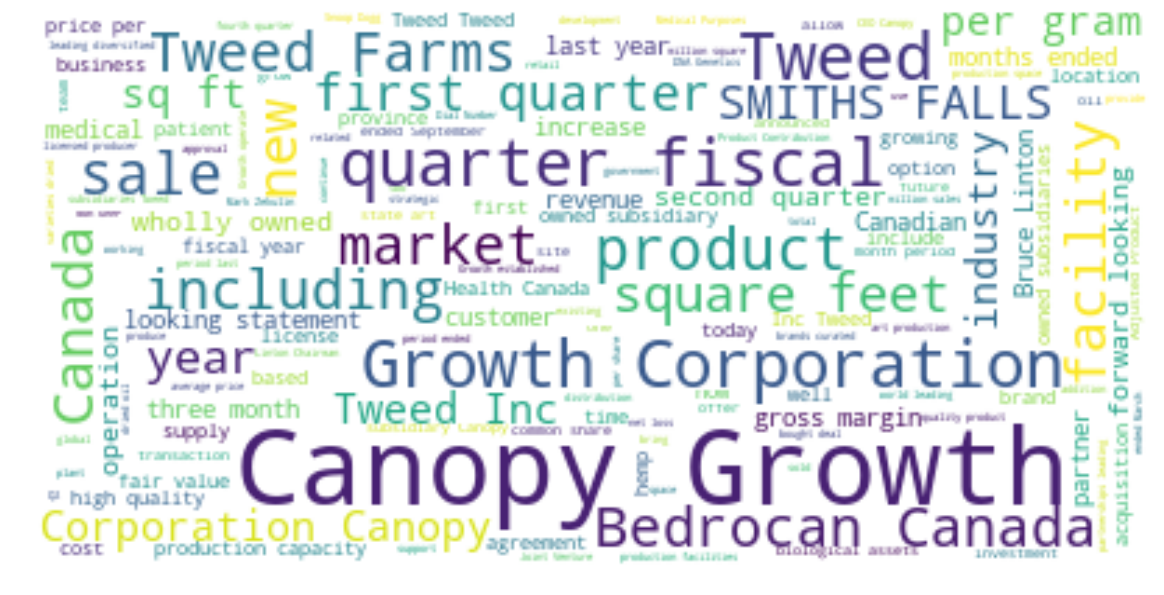

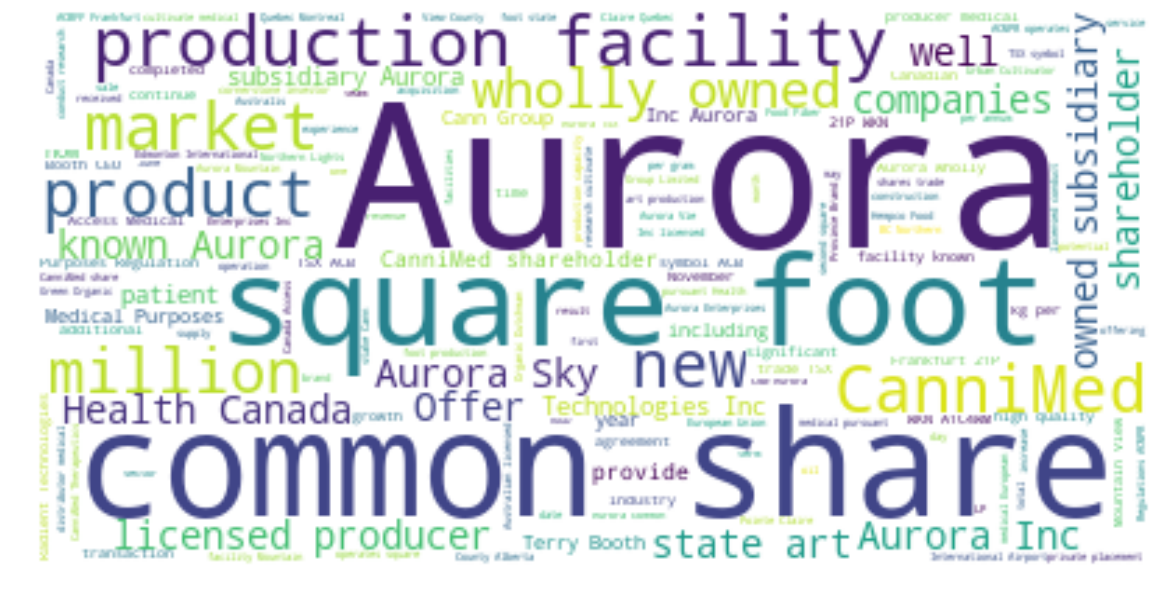

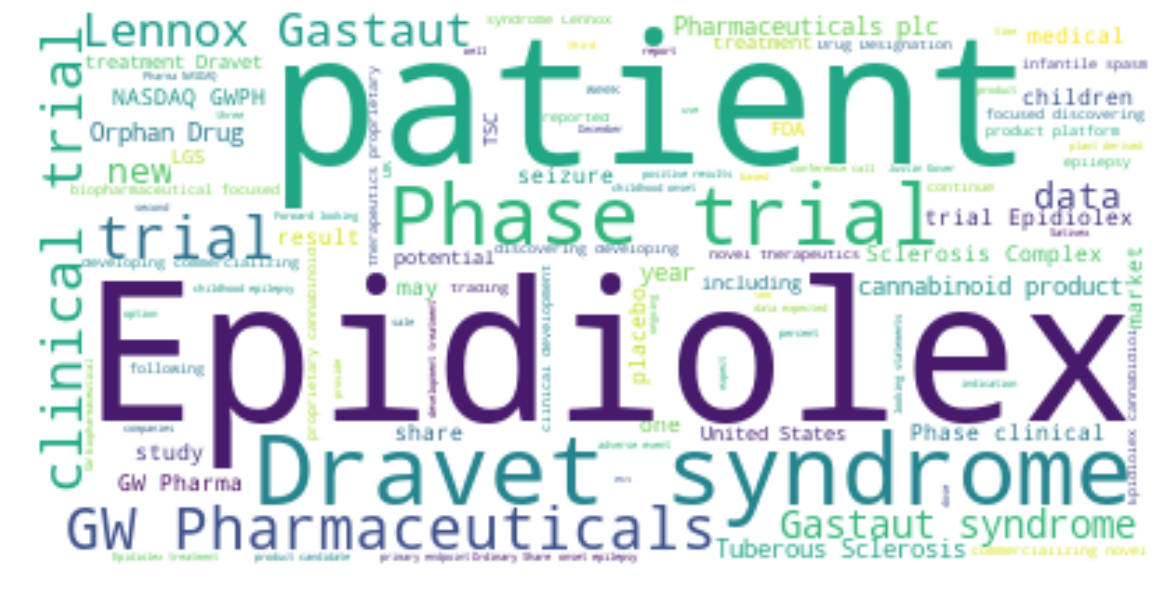

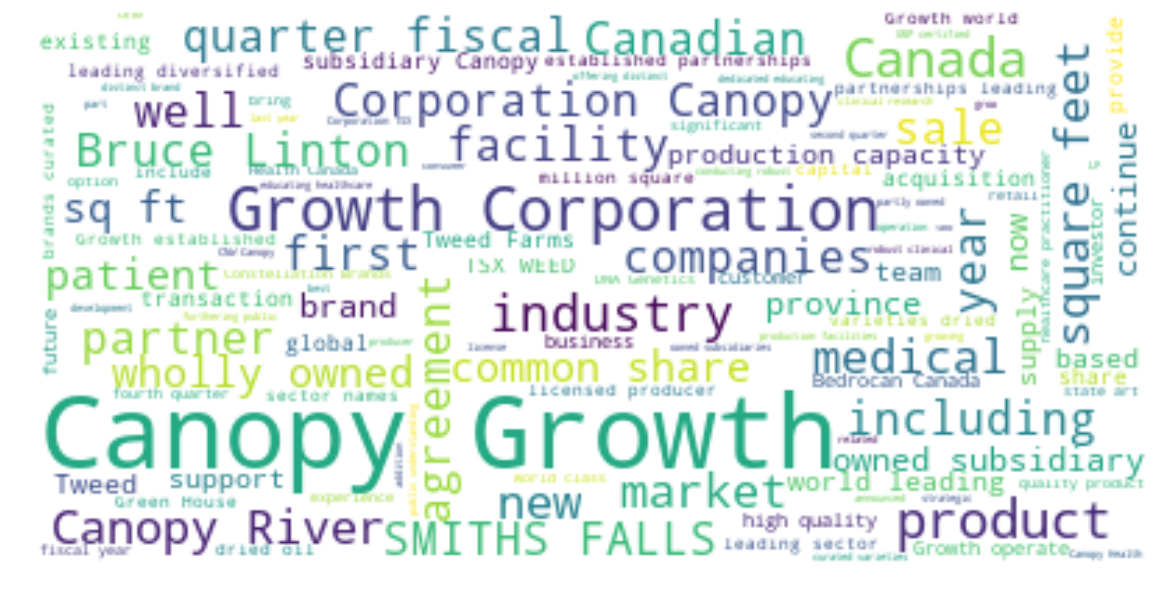

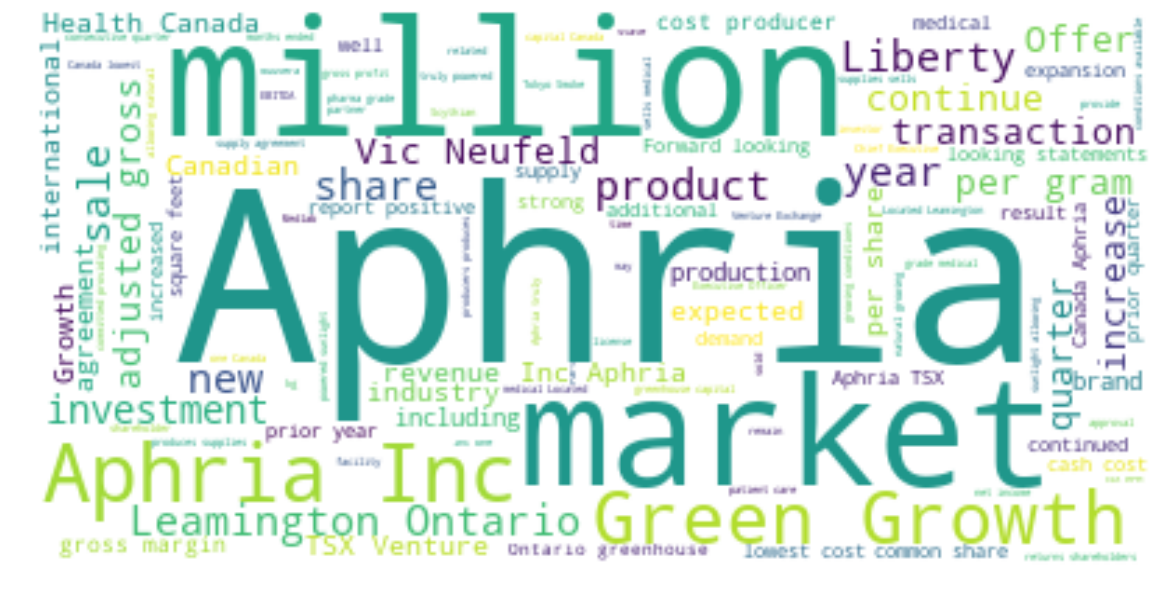

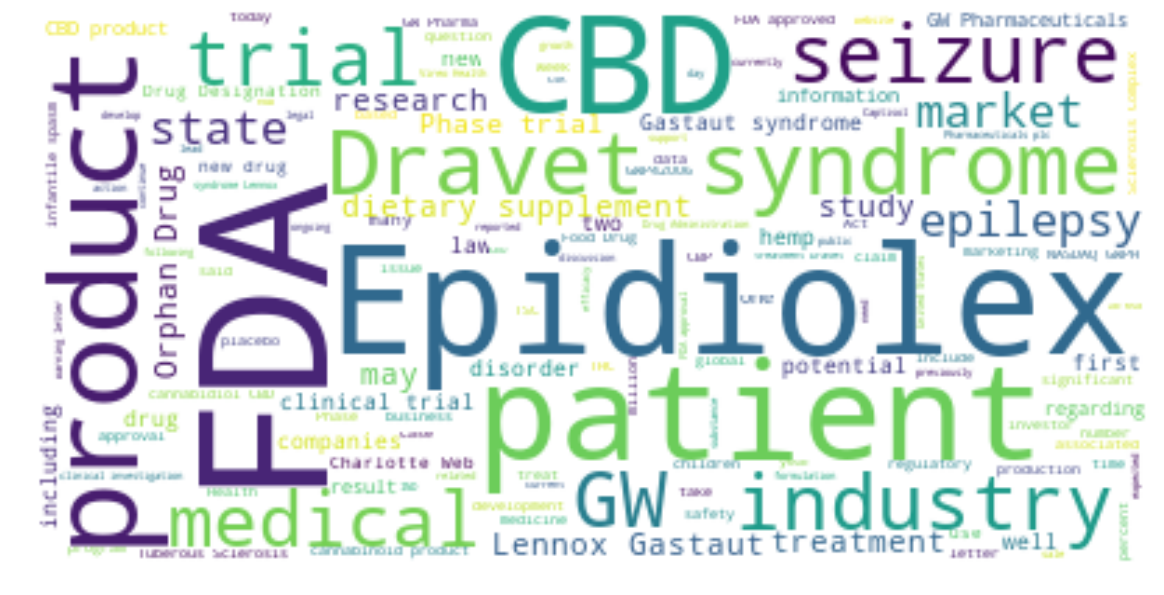

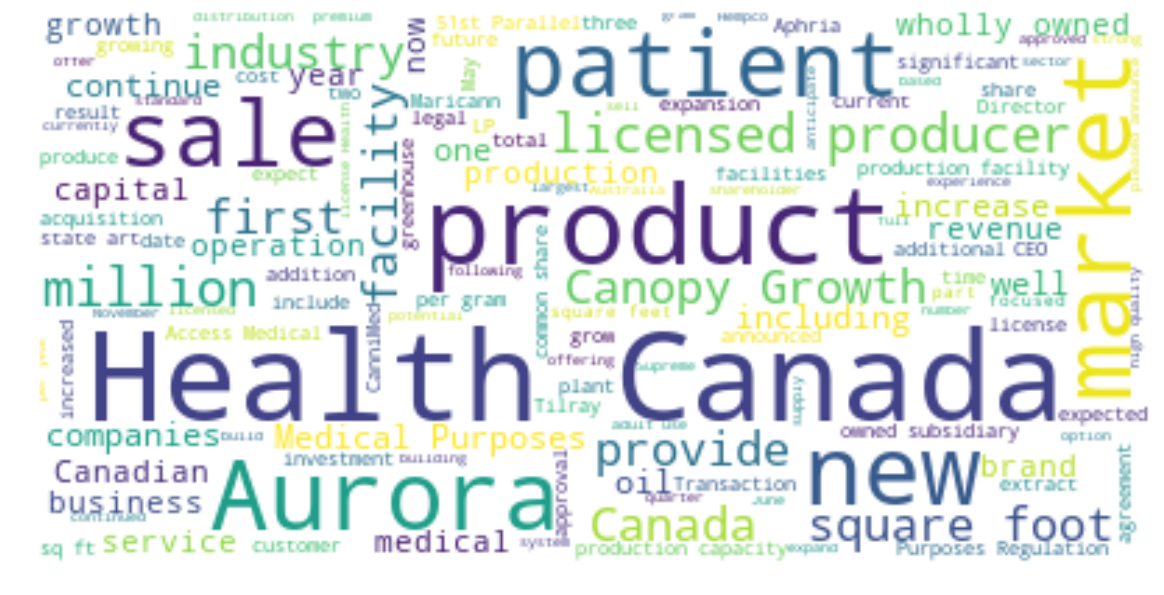

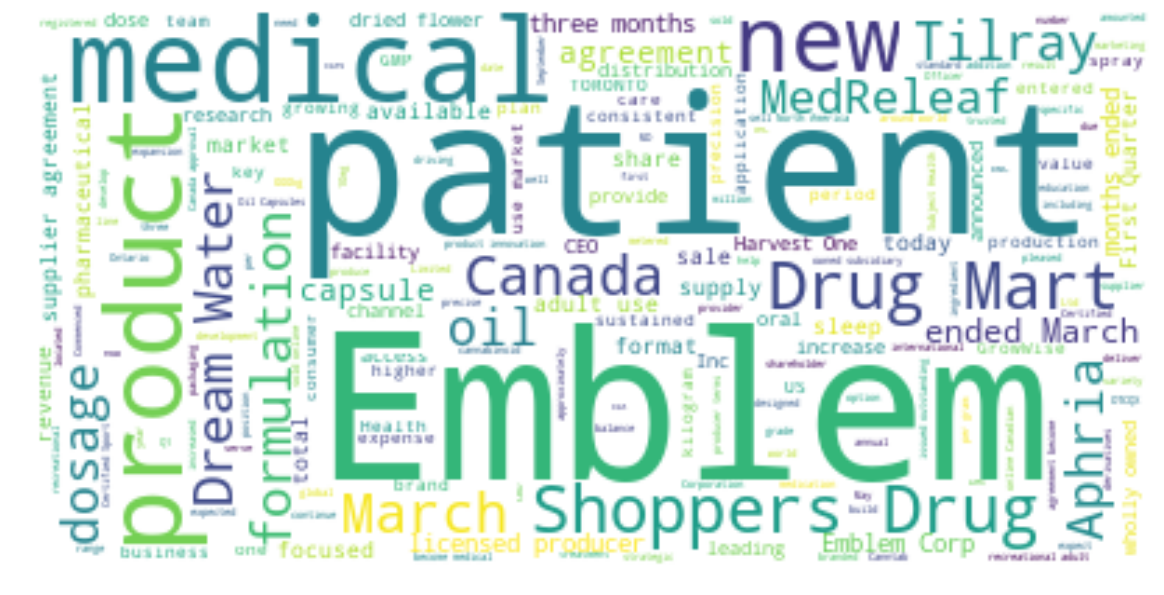

In [10]:
orgs=['Tweed','Aurora', 'GW', 'Canopy Growth','Aphria','FDA','Health Canada','Shoppers Drug Mart']
for org in orgs:
    cloudW(df[df[org]==1],package_dir+'/imgs/'+org+'.png','content')

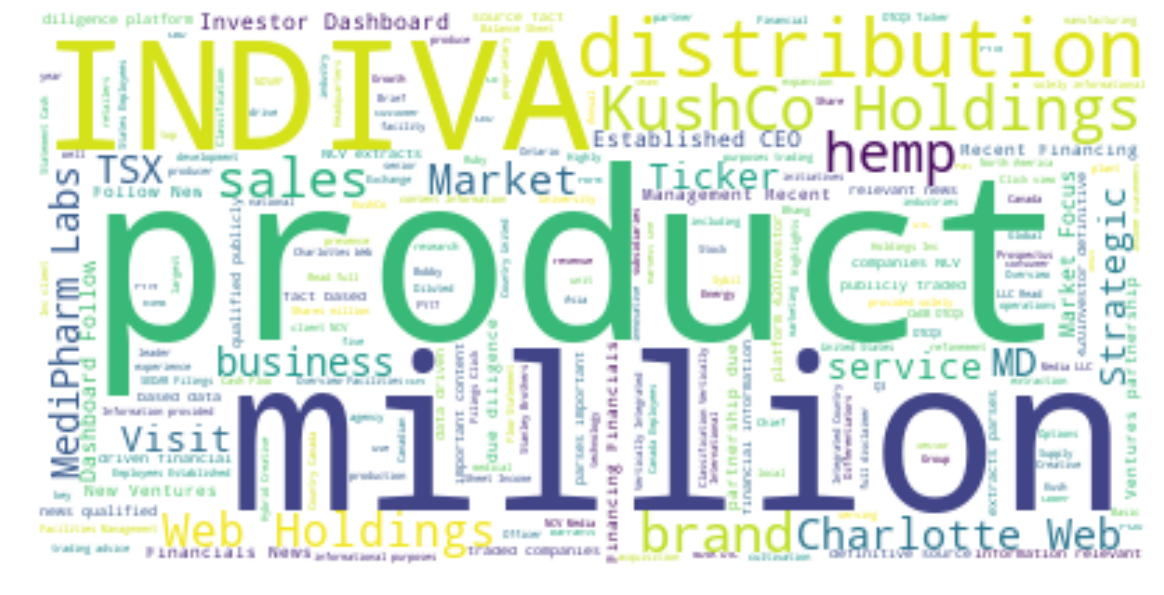

In [11]:
cloudW(df[(df['date'] > '2019-1-1 01:00:00') & (df['date'] <= '2020-1-1 04:00:00')],package_dir+'/imgs/'+'161'+'.png','content')

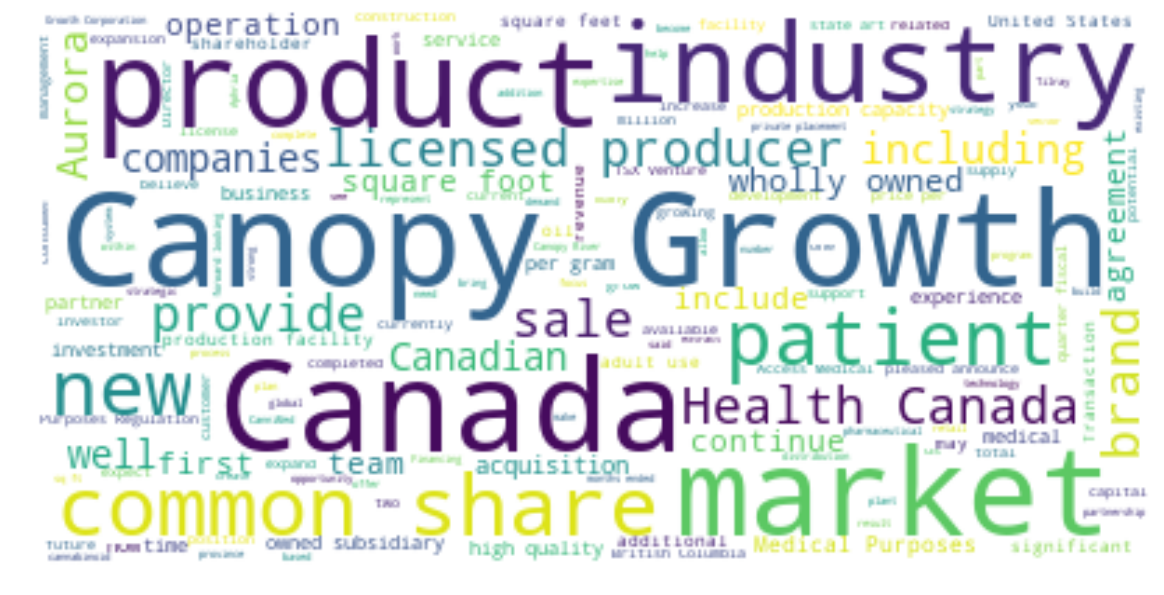

In [12]:
cloudW(df[df['Ca']==1],package_dir+'/imgs/'+'canada'+'.png','content')

# Entities analytics regarding the companies

In [13]:
df['SEC']=df.ORG.apply(lambda x: 1 if 'SEC' in x else 0)

In [14]:
import re
set([re.sub('\W+','',i) for i in df['ORG'].iloc[0][1:-1].split(',')])

{'CGC', 'NestaHoldings', 'TSXV', 'TWMJF', 'Tweed', 'Wikileaf'}

In [15]:
#df['date'].iloc[1925:1928]

In [16]:
df['date']=pandas.to_datetime(df['date'])

In [17]:
df[df['SEC']==1]

Unnamed: 0  Unnamed: 0.1  \
34            34            34   
57            57            57   
101          101           101   
116          116           116   
142          142           142   
143          143           143   
182          182           182   
222          222           223   
244          244           246   
285          285           292   
299          299           308   
382          382           392   
400          400           410   
410          410           420   
469          469           483   
640          640           674   
1006        1006          1090   
1143        1143          1227   
1330        1330          1454   
1454        1454          1593   
1537        1537          1691   
1806        1806          2137   
2060        2060          2533   
2085        2085          2558   
2164        2164          2637   
2166        2166          2639   
2277        2277          2752   
2358        2358          2833   
2547        2547          3023   
2582        2582          3058   
2584        2584          3060   
2589        2589          3065   
2621        2621          3099   

                                                content  \
34    Financially-strapped protection provider to th...   
57     PharmaCielo, a Canadian company with operatio...   
101    The SEC filed civil litigation against cannab...   
116    Michael Toups, Managing Director, Partner and...   
142    How Did NextRX Come About and Why We Chose Eq...   
143    It has been a while since my first interview ...   
182    We continue to caution investors in the canna...   
222    In an 8-K filing with the SEC this afternoon,...   
244   Editor’s Note: We published a follow-up to thi...   
285   The SEC issued a press release yesterday: Mari...   
299    The SEC Halts a Crowdfunded Cannabis Offering...   
382    CNBC reporter Jane Wells interviewed Joel Sch...   
400    Nearly seven months after announcing the acqu...   
410   The SEC charged publicly traded Notis Global (...   
469   CannaKorp, the Massachusetts-based manufacture...   
640   The Securities and Exchange Commission (SEC) m...   
1006   Atlanta-based Surterra Holdings filed a Form ...   
1143   Publicly-traded Timberland Bancorp (NASDAQ: T...   
1330  Vanguard Developed Markets Index Fund Form N-Q...   
1454  SEC filings from Helix TCS (OTC: HLIX) reveale...   
1537   Publicly-traded CannLabs (OTC:  CANL), which ...   
1806  This is a copy of the December 9th edition of ...   
2060   This morning, MassRoots (OTC:MSRT) shareholde...   
2085   On Sept. 30, 2015, Logistics Trust Inc. issue...   
2164   Following up on yesterday’s report that CannL...   
2166   Ligand Pharmaceuticals (NASDAQ: LGND) has iss...   
2277   A Denver software developer that writes code ...   
2358  The ArcView Group team with Melissa Etheridge ...   
2547   Terra Tech (OTC: TRTC), one of the more activ...   
2582  On the heels of a massive move in its stock so...   
2584  MassRoots (OTCMKTS:MSRT) surged almost 23% tod...   
2589   Brenda Hamilton, Securities Attorney Hamilton...   
2621  Render Concept Image of Pineapple Park Cultiva...   

                                                  title                date  \
34              Bail Out for Blue Line Protection Group 2016-05-18 07:47:22   
57    Canadian Cannabis Company with Colombian Opera... 2016-05-31 20:14:18   
101   SEC Charges Hemp Inc. and CEO Bruce Perlowin w... 2016-06-22 08:12:13   
116   Partner of Cannabis Investment Company First H... 2016-06-27 14:24:20   
142   Cannabis Entrepreneur Overcomes Huge Crowdfund... 2016-07-10 20:14:43   
143   Evaluating Cannabis Stocks and What to Conside... 2016-07-11 14:04:11   
182   CBD Incorporated, Another Aggressive Attempt t... 2016-07-27 16:40:05   
222   Medicine Man Technologies to Issue $12.6mm in ... 2016-08-12 16:07:18   
244   Terra Tech Insiders Cash Out As Cannabis Penny... 2016-08-29 09:15:44   
285   SEC Fraud Charges Against Publicly-Traded Cann

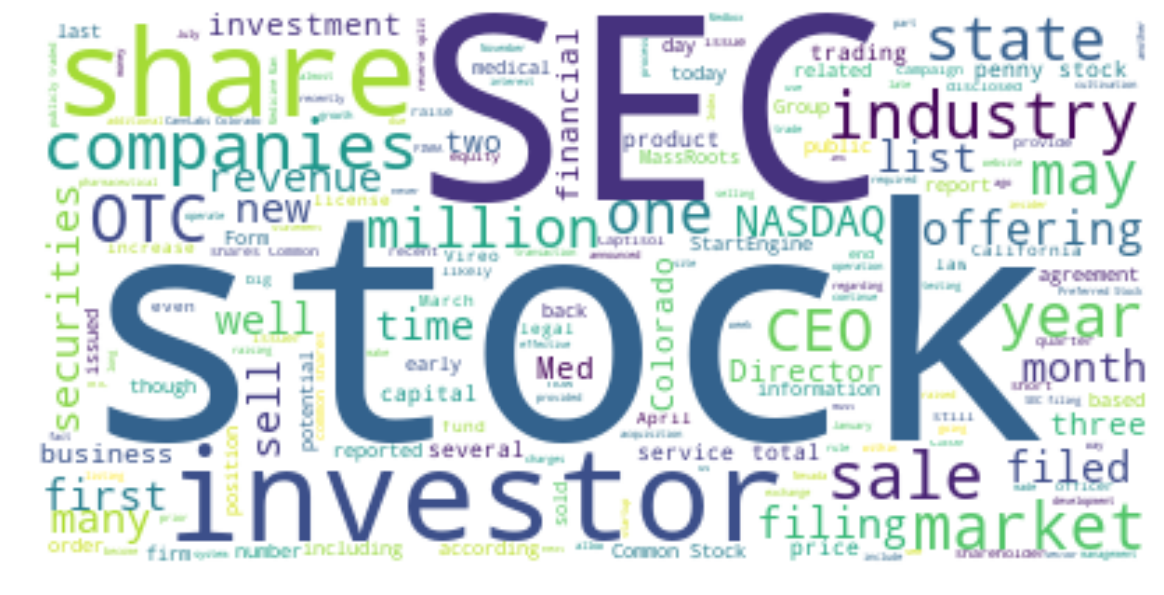

In [18]:
cloudW(df[df['SEC']==1],package_dir+'/imgs/'+'SEC'+'.png','content')

In [19]:
def org_fre(dataF,column):
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    curr=df[df[column]==1]
    curr.date.groupby([curr["date"].dt.year, curr["date"].dt.month]).count().plot(kind="bar")
    plt.savefig(column+'.png', dpi=300, bbox_inches='tight')

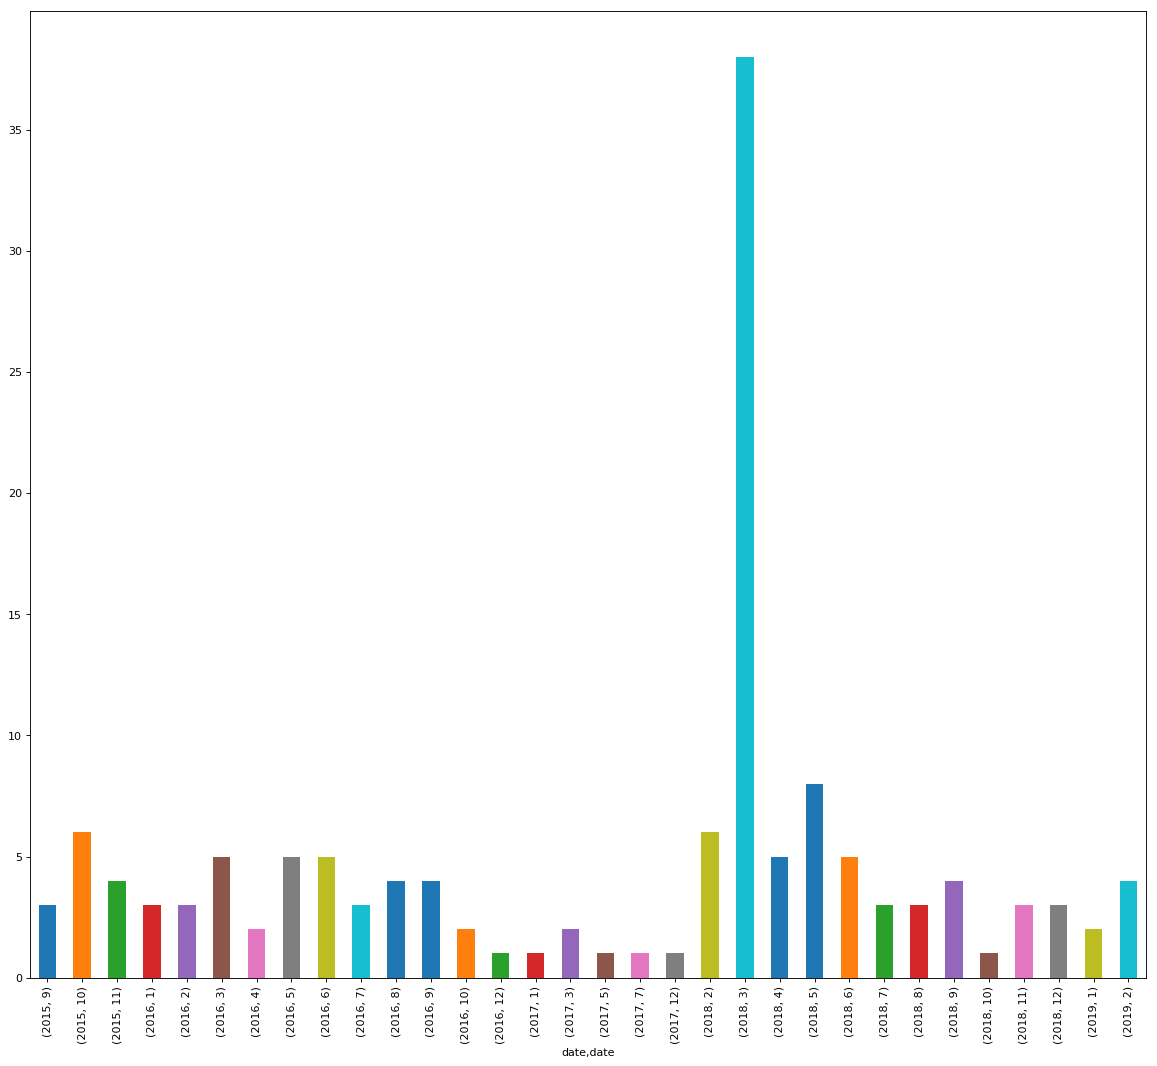

In [20]:
org_fre(df,'Canopy Growth')

In [21]:
pandas.datetime.now()

datetime.datetime(2020, 2, 21, 15, 45, 36, 950735)